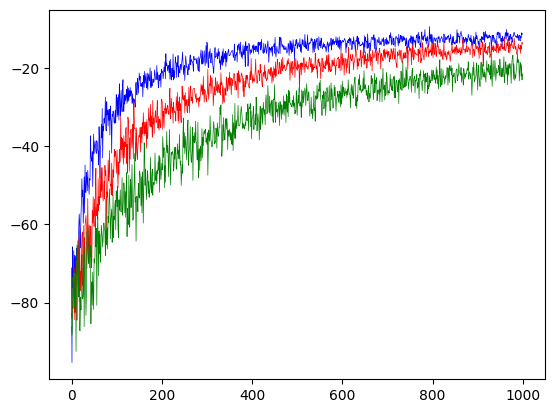

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

class ShortCorridor:
    def __init__(self):
        self.state = 0
    
    def state_shape(self):
        return (3,)
    
    def action_shape(self):
        return 2
     
    def reset(self):
        self.state = 0
        return self.state
    
    def is_terminal_state(self, state):
        return state > 2
    
    def step(self, action):
        if action == 0: #left
            self.state += 1 if self.state == 1 else -1
        else:
            self.state += -1 if self.state == 1 else 1
        if self.state < 0:
            self.state = 0
        return -1, self.state


def softmax(hs):
    es = np.exp(hs)
    es /= es.sum()
    return es

def greedy(qs):
    ismaxs = qs.max() == qs
    indices = [i for i in range(len(qs)) if ismaxs[i]]
    return random.choice(indices)#slow
    #return qs.argmax()


class Actor:
    def __init__(self, env):
        self.action_shape = env.action_shape()
        self.param = np.zeros(self.action_shape)
        self.param = np.log([19,1])
    
    def to_feature(self, state, action):
        feature = np.zeros(self.action_shape)
        feature[action] = 1
        return feature
    
    def select_action(self, state):
        probs = softmax(self.param)
        return np.random.choice(self.action_shape, p = probs)
    
    def policy(self, state):
        return softmax(self.param)

    def train(self, state, action, delta, gamma_t, alpha):
        #eligibility = self.to_feature(state, action) - self.policy(state)
        #self.param += alpha * gamma_t * delta * eligibility
        gradient = self.to_feature(state, action)*(1-self.policy(state))
        self.param += alpha * gamma_t * delta * gradient


def reinforce(env, actor, num_episodes, alpha, gamma = 1.0):
    reward_stat = np.zeros(num_episodes)
    for episode in range(num_episodes):
        states = []
        actions = []
        rewards = []
        state = env.reset()
        total_reward = 0
        while True:
            action = actor.select_action(state)
            reward, next_state = env.step(action)
            total_reward += reward
            states.append(state)
            actions.append(action)
            rewards.append(reward)
            if env.is_terminal_state(next_state):
                break
            state = next_state
        g = 0
        #gs = []
        for t in range(len(rewards)-1,-1,-1):
            g = g * gamma + rewards[t]
            #gs.append(g)
        #for t in range(len(rewards)):
            #g = gs[len(rewards)-1-t]
            gamma_t = math.pow(gamma, t)
            actor.train(states[t], actions[t], g, gamma_t, alpha)
        reward_stat[episode] = total_reward
    return reward_stat


env = ShortCorridor()

num_episodes = 1000
num_run = 100

params = [
    [np.zeros(num_episodes), math.pow(2,-12), "b"],
    [np.zeros(num_episodes), math.pow(2,-13), "r"],
    [np.zeros(num_episodes), math.pow(2,-14), "g"],
]

for param in params:
    avg_reward = param[0]
    alpha = param[1]
    for n in range(num_run):
        actor = Actor(env)
        reward_stat = reinforce(env, actor, num_episodes, alpha)
        avg_reward += reward_stat
    avg_reward /= num_run

for param in params:
    avg_reward = param[0]
    style = param[2]
    plt.plot(range(len(avg_reward)),avg_reward,style,linewidth=0.5)

In [55]:
actor.policy(0)

array([0.54047429, 0.45952571])